In [1]:
import pandas as pd
import os
import numpy as np
import sklearn.decomposition
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

new_rc_params = {"text.usetex": False, "svg.fonttype": "none"}
matplotlib.rcParams.update(new_rc_params)
matplotlib.rcParams["pdf.fonttype"] = 42

In [2]:
file_list = os.listdir(
    "/data/passala/Collaborator_Data/Hagai_zach_circadian/processed_RNA_data"
)
file_list_mapped_data = [f for f in file_list if f.endswith("Gene.out.tab")]
file_list_mapped_data

['HT1004_Solanum_SP5G_A01_Spim_1_6_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A02_Spim_2_6_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A03_Spim_3_6_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A04_Spim_1_9_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A05_Spim_2_9_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A06_Spim_3_9_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A07_BLANK_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A08_Pgri_1_15_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A09_Pgri_2_15_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A10_Pgri_3_15_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A11_Pgri_1_20_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_A12_Pgri_2_20_10481877_232FCWLT3_ReadsPerGene.out.tab',
 'HT1004_Solanum_SP5G_B01_M82_1_6_10481877_232FCWLT3_ReadsPerGene.out.tab'

In [3]:
genome_locations = pd.read_csv(
    "/data/passala/Generated_Tables/Temp_junk/list_of_genome_fastas.csv", sep="\t"
)
genome_locations

,Species,Abbreviation,Genome Fasta,Genome Annotation,Genome Folder
0,S. pimpinelifollium,Spim,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
1,S. lycopersicum,M82,/data/passala/Genomes/Solanum_lycopersicum_4_0...,/data/passala/Genomes/Solanum_lycopersicum_4_0...,/data/passala/Genomes/Solanum_lycopersicum_4_0
2,S. anguivi,Sang,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
3,S. aethiopicum,Saet,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
4,S. aet (SC103),SC103,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
5,S. cleistogamum,Scle,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
6,S. prinophyllum,Spri,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...
7,P. grisea,Pgri,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...,/data/passala/Genomes/Hagai_alignment_genomes/...


In [4]:
# compiled_reads = os.listdir('/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data')
# compiled_reads

In [5]:
compiled_reads = [
    "Spri_tpm.csv",
    "Scle_tpm.csv",
    "Saet_tpm.csv",
    "M82_tpm.csv",
    "Sang_tpm.csv",
]

In [6]:
orthology_info = pd.read_csv(
    "/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/Orthology_Tables/Finalized_Orthology_Nov_15/Reformatted_orthogroup_table.csv"
)
orthology_info

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
2,Solyc01g066020,OG0000005,SlycHeinz4.0
3,Solyc05g024370,OG0000005,SlycHeinz4.0
4,Solyc11g011080,OG0000005,SlycHeinz4.0
...,...,...,...
877265,Solvio1_09g012150,OG0044291,Solvio1_1.1.2
877266,Solvio1_11g011120,OG0044292,Solvio1_1.1.2
877267,Solvio1_11g018310,OG0044292,Solvio1_1.1.2
877268,Solvio1_11g011570,OG0044293,Solvio1_1.1.2


In [7]:
def decode_file_name(file_name):
    parts = file_name.split("_")
    species = parts[4]
    replicate = parts[5]
    time_point = parts[6]
    if int(time_point) < 12:
        time_point = time_point + "am"
    elif int(time_point) >= 12:
        time_point = time_point + "pm"
    else:
        raise Exception("No time point found in file name")

    summary_dictionary = {
        "species": species,
        "replicate": replicate,
        "time_point": time_point,
    }
    return summary_dictionary

In [8]:
species_to_ortho_name_dict = {
    "M82": "SlycHeinz4.0",
    "Sang": "Solang8_1.1.2",
    "Saet": "Solaet3_1.5.2",
    "Scle": "Solcle2_1.2.2",
    "Spri": "Solpri1_1.3.2",
}
species_of_interest = species_to_ortho_name_dict.keys()
species_of_interest_ortho_formatted = [
    species_to_ortho_name_dict[species] for species in species_of_interest
]
species_of_interest_ortho_formatted

['SlycHeinz4.0',
 'Solang8_1.1.2',
 'Solaet3_1.5.2',
 'Solcle2_1.2.2',
 'Solpri1_1.3.2']

In [9]:
trimmed_orthology_info = orthology_info[
    orthology_info["Species"].isin(species_of_interest_ortho_formatted)
]
trimmed_orthology_info

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
2,Solyc01g066020,OG0000005,SlycHeinz4.0
3,Solyc05g024370,OG0000005,SlycHeinz4.0
4,Solyc11g011080,OG0000005,SlycHeinz4.0
...,...,...,...
671767,Solpri1_12g020150,OG0043743,Solpri1_1.3.2
671768,Solpri1_12g022060,OG0043744,Solpri1_1.3.2
671769,Solpri1_12g022870,OG0043745,Solpri1_1.3.2
671770,Solpri1_12g027470,OG0043746,Solpri1_1.3.2


In [10]:
singletons_within_species = trimmed_orthology_info.drop_duplicates(
    subset=["Orthogroup", "Species"], keep=False
)
singletons_within_species

,Gene Name,Orthogroup,Species
0,Solyc04g018150,OG0000003,SlycHeinz4.0
1,Solyc02g030550,OG0000004,SlycHeinz4.0
12,Solyc03g150144,OG0000009,SlycHeinz4.0
205,Solyc08g061145,OG0000015,SlycHeinz4.0
206,Solyc08g021970,OG0000016,SlycHeinz4.0
...,...,...,...
671767,Solpri1_12g020150,OG0043743,Solpri1_1.3.2
671768,Solpri1_12g022060,OG0043744,Solpri1_1.3.2
671769,Solpri1_12g022870,OG0043745,Solpri1_1.3.2
671770,Solpri1_12g027470,OG0043746,Solpri1_1.3.2


In [11]:
species_count = (
    singletons_within_species.groupby("Orthogroup").size().sort_values(ascending=False)
)
orthogroups_present_in_5_species = species_count[species_count == 5].index.tolist()
len(orthogroups_present_in_5_species)

14634

In [12]:
cinctuplets = singletons_within_species[
    singletons_within_species["Orthogroup"].isin(orthogroups_present_in_5_species)
]
cinctuplets

,Gene Name,Orthogroup,Species
4145,Solyc02g062190,OG0001154,SlycHeinz4.0
4901,Solyc03g098700,OG0001535,SlycHeinz4.0
4958,Solyc10g086110,OG0001563,SlycHeinz4.0
5257,Solyc03g119723,OG0001730,SlycHeinz4.0
5990,Solyc10g052603,OG0002133,SlycHeinz4.0
...,...,...,...
668617,Solpri1_11g017660,OG0024878,Solpri1_1.3.2
668622,Solpri1_10g019730,OG0024906,Solpri1_1.3.2
668636,Solpri1_10g020890,OG0024949,Solpri1_1.3.2
668871,Solpri1_10g028100,OG0025394,Solpri1_1.3.2


In [13]:
cinctuplets_dict = dict(zip(cinctuplets["Gene Name"], cinctuplets["Orthogroup"]))
cinctuplets_dict.keys()

dict_keys(['Solyc02g062190', 'Solyc03g098700', 'Solyc10g086110', 'Solyc03g119723', 'Solyc10g052603', 'Solyc00g013100', 'Solyc02g082010', 'Solyc12g008560', 'Solyc02g070100', 'Solyc02g077810', 'Solyc08g044345', 'Solyc10g051260', 'Solyc00g320430', 'Solyc01g150126', 'Solyc09g083210', 'Solyc11g011180', 'Solyc04g015160', 'Solyc04g047800', 'Solyc04g078860', 'Solyc07g054770', 'Solyc01g102400', 'Solyc08g076580', 'Solyc11g006740', 'Solyc02g079120', 'Solyc02g090120', 'Solyc03g097010', 'Solyc03g119380', 'Solyc08g005710', 'Solyc09g092520', 'Solyc12g076350', 'Solyc12g035670', 'Solyc12g087870', 'Solyc02g038825', 'Solyc03g031630', 'Solyc03g044200', 'Solyc03g058330', 'Solyc04g007490', 'Solyc05g010440', 'Solyc08g061060', 'Solyc08g077980', 'Solyc09g064850', 'Solyc12g008860', 'Solyc01g008810', 'Solyc01g101050', 'Solyc02g082400', 'Solyc02g083650', 'Solyc02g088510', 'Solyc03g150109', 'Solyc03g071855', 'Solyc04g007720', 'Solyc06g054320', 'Solyc07g042180', 'Solyc08g080450', 'Solyc10g044510', 'Solyc10g051270',

In [14]:
list_of_formatted_dfs = []
indexer = 0
for tpm_compiled_read_file in compiled_reads:
    current_compiled_reads = f"/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data/{tpm_compiled_read_file}"
    current_species = pd.read_csv(current_compiled_reads, index_col=0).T

    if ":" in current_species.index[0]:
        current_species.index = current_species.index.str.split(":").str[1]

    if "lyc" in current_species.index[0]:

        current_species.index = current_species.index.str.split(".").str[0]

    current_species_cinctuplets = current_species.loc[
        current_species.index.isin(cinctuplets["Gene Name"])
    ]

    current_species_cinctuplets_name_fixed = current_species_cinctuplets.rename(
        index=cinctuplets_dict
    )

    for column_name in current_species_cinctuplets_name_fixed.columns:
        column_attributes = decode_file_name(column_name)
        summarized_name = f"{column_attributes['species']}_{column_attributes['replicate']}_{column_attributes['time_point']}"
        fixed_name_dict = {column_name: summarized_name}
        current_species_cinctuplets_name_fixed = (
            current_species_cinctuplets_name_fixed.rename(columns=fixed_name_dict)
        )
    current_species_cinctuplets_name_fixed = (
        current_species_cinctuplets_name_fixed.reset_index()
        .drop_duplicates(subset="index", keep=False)
        .set_index("index")
    )
    list_of_formatted_dfs.append(current_species_cinctuplets_name_fixed)
    indexer += 1

In [15]:
full_concatenated_df = pd.concat(list_of_formatted_dfs, axis=1)
full_concatenated_df_no_na = full_concatenated_df.dropna(axis=0, how="any")
full_concatenated_df_no_empty = full_concatenated_df_no_na.loc[
    full_concatenated_df_no_na.sum(axis=1) > 0
]
full_concatenated_df_no_empty

Dataset ID,Spri_1_6am,Spri_2_6am,Spri_3_6am,Spri_1_9am,Spri_3_9am,Spri_1_15pm,Spri_2_15pm,Spri_3_15pm,Spri_1_20pm,Spri_2_20pm,...,Sang_3_6am,Sang_1_9am,Sang_2_9am,Sang_3_9am,Sang_1_15pm,Sang_2_15pm,Sang_3_15pm,Sang_1_20pm,Sang_2_20pm,Sang_3_20pm
index,,,,,,,,,,,,,,,,,,,,,
OG0018438,4.168326,3.754397,8.202671,3.753557,3.559170,4.901180,4.543482,5.113947,4.220292,2.578300,...,0.000000,0.000000,0.285272,0.000000,0.304276,0.000000,1.552160,0.265192,0.000000,0.000000
OG0018432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.094786,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0011832,0.000000,0.000000,1.595820,3.264648,0.000000,1.725415,2.799110,7.201272,8.320004,1.270733,...,11.409182,3.622934,2.108976,0.000000,6.748416,2.132722,8.606173,1.960529,2.465766,1.510443
OG0008836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0020479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.281836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0004787,10.937857,8.348012,11.485009,9.117636,15.309666,17.421841,21.949028,22.432608,19.661596,10.646861,...,38.909515,28.132613,19.253464,31.280157,42.724511,38.045304,33.113069,30.447589,24.063166,37.246890
OG0018312,5.787428,2.997312,6.400866,6.547283,5.412292,4.525056,6.045460,4.443760,8.663806,7.449368,...,6.938435,3.304903,1.603204,5.238087,4.788016,8.430523,4.797649,7.749855,7.872600,7.807826
OG0021036,3.563246,7.938733,3.763619,6.634608,4.071040,4.415579,4.073256,3.974896,6.471114,4.591037,...,2.577037,6.455685,5.292919,5.939892,8.581194,11.026177,5.471746,9.447090,5.817057,8.415516


In [16]:
from sklearn.datasets import load_iris

In [17]:
fixed_orientation_full_rna_df = full_concatenated_df_no_empty.T

In [18]:
fixed_orientation_full_rna_df

index,OG0018438,OG0018432,OG0011832,OG0008836,OG0020479,OG0019891,OG0017728,OG0006695,OG0018132,OG0005498,...,OG0018309,OG0005001,OG0020125,OG0018310,OG0018311,OG0004787,OG0018312,OG0021036,OG0013223,OG0009138
Dataset ID,,,,,,,,,,,,,,,,,,,,,
Spri_1_6am,4.168326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.701214,0.000000,0.000000,...,0.829823,129.985948,18.950842,0.000000,0.000000,10.937857,5.787428,3.563246,10.420814,2.075402
Spri_2_6am,3.754397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.719064,301.320001,14.621828,0.000000,0.000000,8.348012,2.997312,7.938733,9.984350,4.678768
Spri_3_6am,8.202671,0.000000,1.595820,0.000000,0.000000,0.000000,0.000000,0.835196,0.000000,0.000000,...,1.729663,170.108852,15.431747,0.000000,0.000000,11.485009,6.400866,3.763619,8.843505,2.980884
Spri_1_9am,3.753557,0.000000,3.264648,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010988,198.857166,14.017793,0.000000,0.000000,9.117636,6.547283,6.634608,12.378458,2.491314
Spri_3_9am,3.559170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.679031,223.501834,10.285360,0.000000,0.300959,15.309666,5.412292,4.071040,17.907075,3.296636
Spri_1_15pm,4.901180,0.000000,1.725415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.267161,313.178029,7.719900,0.000000,0.000000,17.421841,4.525056,4.415579,18.452359,5.659830
Spri_2_15pm,4.543482,0.000000,2.799110,0.000000,0.000000,0.000000,0.000000,1.464955,0.000000,0.000000,...,0.866821,184.937660,6.463923,0.000000,0.000000,21.949028,6.045460,4.073256,22.042988,5.483598
Spri_3_15pm,5.113947,0.000000,7.201272,0.000000,0.000000,0.000000,0.000000,0.942223,0.000000,0.000000,...,0.000000,189.696672,6.495993,0.000000,0.000000,22.432608,4.443760,3.974896,19.253402,4.265106
Spri_1_20pm,4.220292,0.000000,8.320004,0.000000,0.000000,0.000000,0.000000,1.088599,0.000000,0.000000,...,1.288259,166.546052,9.456500,0.000000,0.000000,19.661596,8.663806,6.471114,15.166675,4.264355


In [19]:
label_dataframe = pd.DataFrame(index=fixed_orientation_full_rna_df.index)
label_dataframe["Species"] = label_dataframe.index.str.split("_").str[0]
label_dataframe["Time"] = label_dataframe.index.str.split("_").str[2]
label_dataframe

,Species,Time
Dataset ID,,
Spri_1_6am,Spri,6am
Spri_2_6am,Spri,6am
Spri_3_6am,Spri,6am
Spri_1_9am,Spri,9am
Spri_3_9am,Spri,9am
Spri_1_15pm,Spri,15pm
Spri_2_15pm,Spri,15pm
Spri_3_15pm,Spri,15pm
Spri_1_20pm,Spri,20pm


In [20]:
reduced_2_component = sklearn.decomposition.PCA(n_components=3).fit_transform(
    fixed_orientation_full_rna_df
)

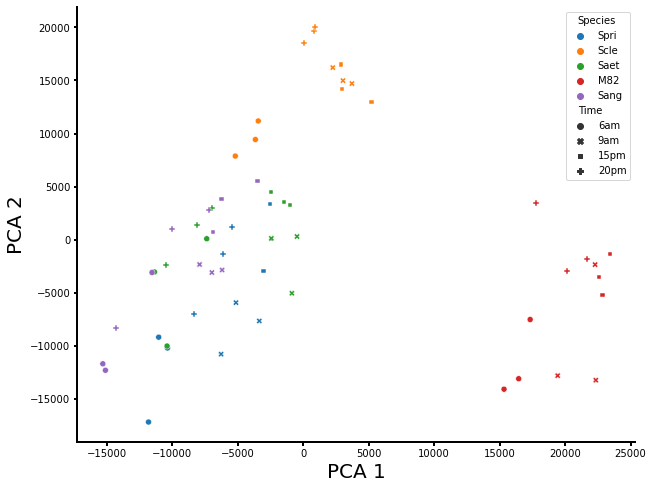

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor("white")

sns.scatterplot(
    x=reduced_2_component[:, 0],
    y=reduced_2_component[:, 1],
    hue=label_dataframe["Species"],
    style=label_dataframe["Time"],
)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)

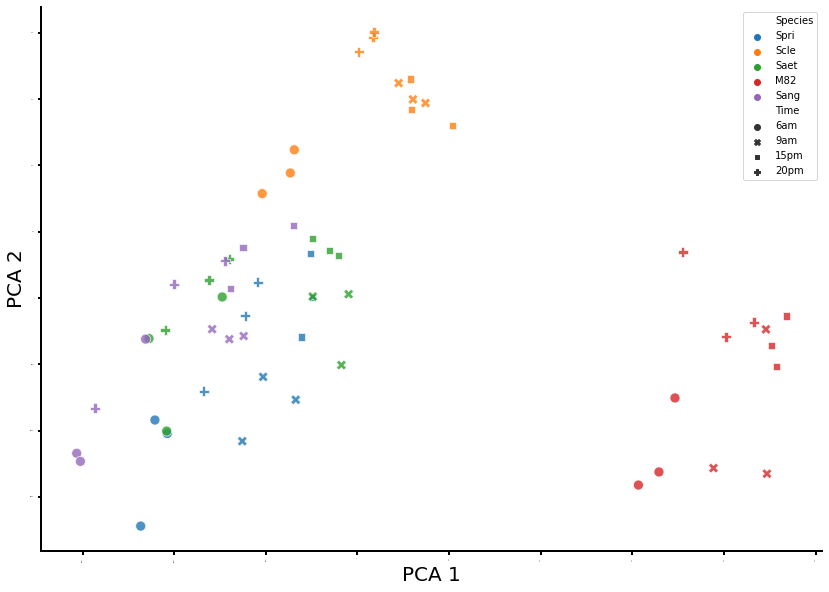

In [22]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
sns.scatterplot(
    x=reduced_2_component[:, 0],
    y=reduced_2_component[:, 1],
    hue=label_dataframe["Species"],
    style=label_dataframe["Time"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)

# plt.ylim(0,10)
plt.savefig(
    "/data/passala/Collaborator_Data/Hagai_zach_circadian/Plots/PCA_5_species_no_correction.pdf",
    dpi=1200,
)

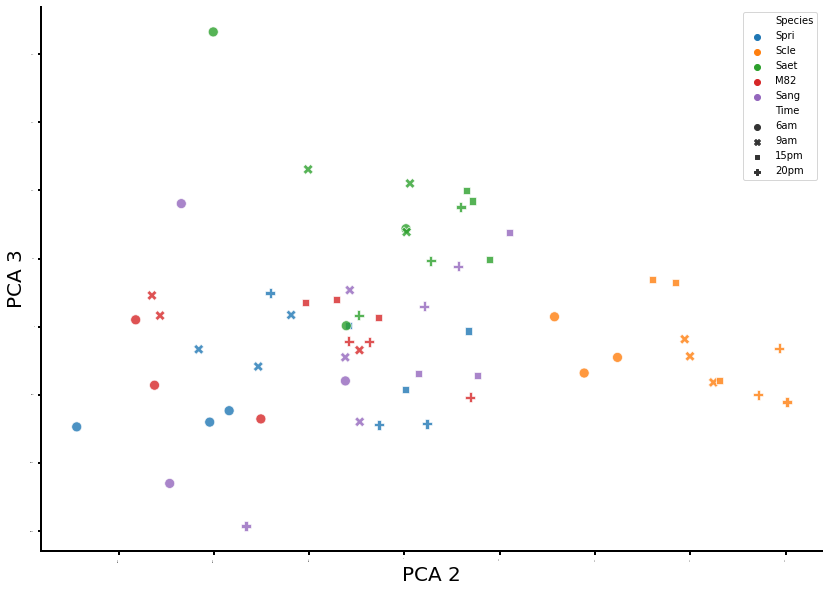

In [23]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
sns.scatterplot(
    x=reduced_2_component[:, 1],
    y=reduced_2_component[:, 2],
    hue=label_dataframe["Species"],
    style=label_dataframe["Time"],
    s=100,
    alpha=0.8,
)
plt.xlabel("PCA 2", fontsize=20)
plt.ylabel("PCA 3", fontsize=20)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)

# plt.ylim(0,10)
plt.savefig(
    "/data/passala/Collaborator_Data/Hagai_zach_circadian/Plots/PCA_5_species_no_correction.pdf",
    dpi=1200,
)

In [ ]:
list_of_files_to_read = os.listdir('/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data')
list_of_files_to_read


['Spim_tpm.csv',
 'M82_tpm.csv',
 'Sang_tpm.csv',
 'Saet_tpm.csv',
 'SC103_tpm.csv',
 'Scle_tpm.csv',
 'Spri_tpm.csv',
 'Pgri_tpm.csv']

In [31]:
for file in list_of_files_to_read:
    file_location = f"/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data/{file}"
    current_file = pd.read_csv(file_location, index_col=0).T
    current_file = current_file.rename_axis(None, axis=1)
    current_file.to_csv(f'/data/passala/Collaborator_Data/Hagai_zach_circadian/Transposed_TPM_RNA_data/{file}', index=True)

In [30]:
current_file

,HT1004_Solanum_SP5G_A01_Spim_1_6_,HT1004_Solanum_SP5G_A02_Spim_2_6_,HT1004_Solanum_SP5G_A03_Spim_3_6_,HT1004_Solanum_SP5G_A04_Spim_1_9_,HT1004_Solanum_SP5G_A05_Spim_2_9_,HT1004_Solanum_SP5G_A06_Spim_3_9_,HT1004_Solanum_SP5G_B07_Spim_1_15_,HT1004_Solanum_SP5G_B08_Spim_2_15_,HT1004_Solanum_SP5G_B09_Spim_3_15_,HT1004_Solanum_SP5G_B10_Spim_1_20_,HT1004_Solanum_SP5G_B11_Spim_2_20_,HT1004_Solanum_SP5G_B12_Spim_3_20_
Solyc00g500371.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TomatoPan016070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solyc00g500409.1,1.959655,0.777360,0.000000,0.000000,0.000000,0.000000,0.000000,0.661918,0.000000,0.000000,0.000000,0.000000
Solyc00g500009.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solyc00g500013.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc12g100320.2,9.498940,3.391253,4.917859,4.273139,5.093229,3.664238,4.738464,8.662906,8.626973,9.575164,9.047829,9.368876
Solyc12g100330.2,2.027188,3.187876,5.379944,4.368112,5.434781,3.947200,6.500861,7.189653,6.904123,3.113836,3.813152,1.660656
Solyc12g100340.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solyc12g100360.1,1.931788,1.954079,2.627816,1.158697,2.416875,1.192307,1.697869,1.859640,1.937213,2.077109,1.840046,2.126887


In [ ]:
current_species_cinctuplets = current_species.loc[
    current_species.index.isin(cinctuplets["Gene Name"])
]

In [ ]:
if "lyc" in current_species.index[0]:
    split_index_gene_id = current_species.index[0].split("lyc").str[1]
    current_species.index = "SollycM82_" + split_index_gene_id

In [ ]:
current_compiled_reads = "/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data/M82_tpm.csv"
current_species = pd.read_csv(current_compiled_reads, index_col=0).T
current_species.index = current_species.index.str.split(":").str[1]
current_species_cinctuplets = current_species.loc[
    current_species.index.isin(cinctuplets["Gene Name"])
]
current_species_cinctuplets

Dataset ID,HT1004_Solanum_SP5G_B01_M82_1_6_,HT1004_Solanum_SP5G_B02_M82_2_6_,HT1004_Solanum_SP5G_B03_M82_3_6_,HT1004_Solanum_SP5G_B04_M82_1_9_,HT1004_Solanum_SP5G_B05_M82_2_9_,HT1004_Solanum_SP5G_B06_M82_3_9_,HT1004_Solanum_SP5G_C07_M82_1_15_,HT1004_Solanum_SP5G_C08_M82_2_15_,HT1004_Solanum_SP5G_C09_M82_3_15_,HT1004_Solanum_SP5G_C10_M82_1_20_,HT1004_Solanum_SP5G_C11_M82_2_20_,HT1004_Solanum_SP5G_C12_M82_3_20_


In [ ]:
current_species_cinctuplets_name_fixed = current_species_cinctuplets.rename(
    index=cinctuplets_dict
)
current_species_cinctuplets_name_fixed
for column_name in current_species_cinctuplets_name_fixed.columns:
    column_attributes = decode_file_name(column_name)
    summarized_name = f"{column_attributes['species']}_{column_attributes['replicate']}_{column_attributes['time_point']}"
    fixed_name_dict = {column_name: summarized_name}
    current_species_cinctuplets_name_fixed = (
        current_species_cinctuplets_name_fixed.rename(columns=fixed_name_dict)
    )
current_species_cinctuplets_name_fixed

Dataset ID,Scle_1_6am,Scle_2_6am,Scle_3_6am,Scle_1_9am,Scle_2_9am,Scle_3_9am,Scle_1_15pm,Scle_2_15pm,Scle_3_15pm,Scle_1_20pm,Scle_2_20pm,Scle_3_20pm
OG0018438,0.000000,0.000000,0.203133,0.000000,0.000000,0.000000,0.000000,0.375221,0.895970,0.000000,0.000000,0.000000
OG0021255,0.000000,0.000000,0.038862,0.137240,0.309546,0.097433,0.077006,0.502490,0.257115,0.574798,0.216967,0.433099
OG0018432,0.000000,0.000000,0.000000,1.523013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.204195
OG0011832,0.000000,4.358897,0.000000,0.000000,0.000000,0.000000,2.975724,0.000000,3.311889,0.000000,1.676842,1.859577
OG0008836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
OG0018311,0.000000,0.000000,0.000000,0.402422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.634978
OG0004787,24.962257,17.035689,14.879571,16.347936,22.057924,20.034502,27.191015,20.461077,27.345873,21.192942,26.583335,26.818861
OG0018312,10.476819,9.126305,5.030736,9.771274,7.513368,6.516672,10.965378,8.363341,6.656798,13.228184,11.234676,15.262255
OG0013223,9.149777,9.676912,14.266016,31.031269,16.056843,19.568362,7.374381,5.728628,6.155595,4.077403,8.311037,3.072246


In [ ]:
test_2_current_compiled_reads = "/data/passala/Collaborator_Data/Hagai_zach_circadian/TPM_normalized_and_formatted_RNA_data/Sang_tpm.csv"
test_2_current_species = pd.read_csv(test_2_current_compiled_reads, index_col=0).T
test_2_current_species.index = test_2_current_species.index.str.split(":").str[1]
test_2_current_species_cinctuplets = test_2_current_species.loc[
    test_2_current_species.index.isin(cinctuplets["Gene Name"])
]
test_2_current_species_cinctuplets

Dataset ID,HT1004_Solanum_SP5G_C01_Sang_1_6_,HT1004_Solanum_SP5G_C02_Sang_2_6_,HT1004_Solanum_SP5G_C03_Sang_3_6_,HT1004_Solanum_SP5G_C04_Sang_1_9_,HT1004_Solanum_SP5G_C05_Sang_2_9_,HT1004_Solanum_SP5G_C06_Sang_3_9_,HT1004_Solanum_SP5G_D07_Sang_1_15_,HT1004_Solanum_SP5G_D08_Sang_2_15_,HT1004_Solanum_SP5G_D09_Sang_3_15_,HT1004_Solanum_SP5G_D10_Sang_1_20_,HT1004_Solanum_SP5G_D11_Sang_2_20_,HT1004_Solanum_SP5G_D12_Sang_3_20_
Solang8_Cg000020,0.000000,0.000000,0.000000,0.000000,0.285272,0.000000,0.304276,0.000000,1.552160,0.265192,0.000000,0.000000
Solang8_Cg000130,0.000000,0.000000,0.073812,0.046877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solang8_Cg000350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solang8_Cg000520,0.000000,3.133097,11.409182,3.622934,2.108976,0.000000,6.748416,2.132722,8.606173,1.960529,2.465766,1.510443
Solang8_Mg000160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Solang8_12g030360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Solang8_12g030390,39.639909,50.959300,38.909515,28.132613,19.253464,31.280157,42.724511,38.045304,33.113069,30.447589,24.063166,37.246890
Solang8_12g030410,5.411623,10.003227,6.938435,3.304903,1.603204,5.238087,4.788016,8.430523,4.797649,7.749855,7.872600,7.807826
Solang8_12g030490,54.758188,48.159648,35.974054,63.185667,39.275197,48.412404,49.206044,51.695673,31.093269,31.874405,43.004117,68.461582


In [ ]:
test_2_current_species_cinctuplets_name_fixed = (
    test_2_current_species_cinctuplets.rename(index=cinctuplets_dict)
)
test_2_current_species_cinctuplets_name_fixed
for column_name in test_2_current_species_cinctuplets_name_fixed.columns:
    column_attributes = decode_file_name(column_name)
    summarized_name = f"{column_attributes['species']}_{column_attributes['replicate']}_{column_attributes['time_point']}"
    fixed_name_dict = {column_name: summarized_name}
    test_2_current_species_cinctuplets_name_fixed = (
        test_2_current_species_cinctuplets_name_fixed.rename(columns=fixed_name_dict)
    )
test_2_current_species_cinctuplets_name_fixed

Dataset ID,Sang_1_6am,Sang_2_6am,Sang_3_6am,Sang_1_9am,Sang_2_9am,Sang_3_9am,Sang_1_15pm,Sang_2_15pm,Sang_3_15pm,Sang_1_20pm,Sang_2_20pm,Sang_3_20pm
OG0018438,0.000000,0.000000,0.000000,0.000000,0.285272,0.000000,0.304276,0.000000,1.552160,0.265192,0.000000,0.000000
OG0021255,0.000000,0.000000,0.073812,0.046877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0018432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0011832,0.000000,3.133097,11.409182,3.622934,2.108976,0.000000,6.748416,2.132722,8.606173,1.960529,2.465766,1.510443
OG0008836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
OG0018311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0004787,39.639909,50.959300,38.909515,28.132613,19.253464,31.280157,42.724511,38.045304,33.113069,30.447589,24.063166,37.246890
OG0018312,5.411623,10.003227,6.938435,3.304903,1.603204,5.238087,4.788016,8.430523,4.797649,7.749855,7.872600,7.807826
OG0013223,54.758188,48.159648,35.974054,63.185667,39.275197,48.412404,49.206044,51.695673,31.093269,31.874405,43.004117,68.461582


In [ ]:
test_concat = pd.concat(
    [
        current_species_cinctuplets_name_fixed,
        test_2_current_species_cinctuplets_name_fixed,
    ],
    axis=1,
)
test_concat

Dataset ID,Scle_1_6am,Scle_2_6am,Scle_3_6am,Scle_1_9am,Scle_2_9am,Scle_3_9am,Scle_1_15pm,Scle_2_15pm,Scle_3_15pm,Scle_1_20pm,...,Sang_3_6am,Sang_1_9am,Sang_2_9am,Sang_3_9am,Sang_1_15pm,Sang_2_15pm,Sang_3_15pm,Sang_1_20pm,Sang_2_20pm,Sang_3_20pm
OG0018438,0.000000,0.000000,0.203133,0.000000,0.000000,0.000000,0.000000,0.375221,0.895970,0.000000,...,0.000000,0.000000,0.285272,0.000000,0.304276,0.000000,1.552160,0.265192,0.000000,0.000000
OG0021255,0.000000,0.000000,0.038862,0.137240,0.309546,0.097433,0.077006,0.502490,0.257115,0.574798,...,0.073812,0.046877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0018432,0.000000,0.000000,0.000000,1.523013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0011832,0.000000,4.358897,0.000000,0.000000,0.000000,0.000000,2.975724,0.000000,3.311889,0.000000,...,11.409182,3.622934,2.108976,0.000000,6.748416,2.132722,8.606173,1.960529,2.465766,1.510443
OG0008836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OG0018311,0.000000,0.000000,0.000000,0.402422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OG0004787,24.962257,17.035689,14.879571,16.347936,22.057924,20.034502,27.191015,20.461077,27.345873,21.192942,...,38.909515,28.132613,19.253464,31.280157,42.724511,38.045304,33.113069,30.447589,24.063166,37.246890
OG0018312,10.476819,9.126305,5.030736,9.771274,7.513368,6.516672,10.965378,8.363341,6.656798,13.228184,...,6.938435,3.304903,1.603204,5.238087,4.788016,8.430523,4.797649,7.749855,7.872600,7.807826
OG0013223,9.149777,9.676912,14.266016,31.031269,16.056843,19.568362,7.374381,5.728628,6.155595,4.077403,...,35.974054,63.185667,39.275197,48.412404,49.206044,51.695673,31.093269,31.874405,43.004117,68.461582


In [30]:
results = decode_file_name(current_species_cinctuplets_name_fixed.columns[0])
summary_name = f"{results['species']}_{results['replicate']}_{results['time_point']}"
summary_name

'Scle_1_6am'

In [ ]:
sklearn

In [ ]:
for

,Gene ID,Unstranded,1st Strand,2nd Strand
4,gene:Solcle2_Cg000010,19927,20255,0
5,gene:Solcle2_Cg000020,0,0,314
6,gene:Solcle2_Cg000030,2,1,32
7,gene:Solcle2_Cg000040,2,17,1
8,gene:Solcle2_Cg000050,0,0,0
...,...,...,...,...
32680,gene:Solcle2_ctg00000483g000010,0,0,0
32681,gene:Solcle2_ctg00000484g000010,0,0,0
32682,gene:Solcle2_ctg00000484g000020,0,0,0
32683,gene:Solcle2_ctg00000484g000030,0,0,0


In [ ]:
test_data[4:].sum(axis=0)

Gene ID       gene:Solcle2_Cg000010gene:Solcle2_Cg000020gene...
Unstranded                                              1906257
1st Strand                                              1926795
2nd Strand                                                91914
dtype: object